In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!zip -r "/content/drive/MyDrive/agronica/custom_dataset.zip" "/content/drive/MyDrive/agronica/custom_dataset"

  adding: content/drive/MyDrive/agronica/custom_dataset/ (stored 0%)
  adding: content/drive/MyDrive/agronica/custom_dataset/labels/ (stored 0%)
  adding: content/drive/MyDrive/agronica/custom_dataset/labels/val/ (stored 0%)
  adding: content/drive/MyDrive/agronica/custom_dataset/labels/val/Coffee_3_png.rf.360b8a84d78e16de6f54a2d5a32189ae.txt (deflated 30%)
  adding: content/drive/MyDrive/agronica/custom_dataset/labels/val/Coffee_2226_png.rf.70600df8eeb349571f7f62d18fde6ff8.txt (deflated 38%)
  adding: content/drive/MyDrive/agronica/custom_dataset/labels/val/Coffee_2220_png.rf.234fc34dbda182cbfeec1824edc2c30c.txt (deflated 74%)
  adding: content/drive/MyDrive/agronica/custom_dataset/labels/val/Coffee_745_png.rf.46aa776a086d45728a7b0e0cf1d573d9.txt (deflated 84%)
  adding: content/drive/MyDrive/agronica/custom_dataset/labels/val/Coffee_2227_png.rf.25a012aef91015b56529b36ebece9380.txt (deflated 84%)
  adding: content/drive/MyDrive/agronica/custom_dataset/labels/val/Coffee_751_png.rf.08ec

In [ ]:
!unzip "/content/drive/MyDrive/Yolo_v6/datasets_usados_estructurados/custom_dataset.zip" 

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: content/drive/MyDrive/Yolo_v6/datasets_usados_estructurados/custom_dataset/labels/train/0000351uav0000270_00001_v.txt  
  inflating: content/drive/MyDrive/Yolo_v6/datasets_usados_estructurados/custom_dataset/labels/train/0000107uav0000140_01590_v.txt  
  inflating: content/drive/MyDrive/Yolo_v6/datasets_usados_estructurados/custom_dataset/labels/train/0000664uav0000278_00001_v.txt  
  inflating: content/drive/MyDrive/Yolo_v6/datasets_usados_estructurados/custom_dataset/labels/train/0000381uav0000222_03150_v.txt  
  inflating: content/drive/MyDrive/Yolo_v6/datasets_usados_estructurados/custom_dataset/labels/train/0000156uav0000072_05448_v.txt  
  inflating: content/drive/MyDrive/Yolo_v6/datasets_usados_estructurados/custom_dataset/labels/train/0000116uav0000279_00001_v.txt  
  inflating: content/drive/MyDrive/Yolo_v6/datasets_usados_estructurados/custom_dataset/labels/train/0000235uav0000013_00000_v.txt  
  inflat

In [ ]:
len(os.listdir("/content/content/drive/MyDrive/Yolo_v6/datasets_usados_estructurados/custom_dataset/images/train"))

20000

In [ ]:
len(os.listdir("/content/content/drive/MyDrive/Yolo_v6/datasets_usados_estructurados/custom_dataset/labels/train"))

20000

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-9-gf9ca365 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 22.6/78.2 GB disk)


In [ ]:
%%writefile /content/yolov5/data/coco128.yaml
# Please insure that your custom_dataset are put in same parent dir with YOLOv6_DIR
train: /content/content/drive/MyDrive/Yolo_v6/datasets_usados_estructurados/custom_dataset/images/train/ # train images
val: /content/content/drive/MyDrive/Yolo_v6/datasets_usados_estructurados/custom_dataset/images/val/ # val images
test: /content/content/drive/MyDrive/Yolo_v6/datasets_usados_estructurados/custom_dataset/images/test/ # test images (optional)


# Classes
nc: 10  # number of classes


names:
  0: pedestrian
  1: people
  2: bicycle
  3: car
  4: van
  5: truck
  6: tricycle
  7: awning-tricycle
  8: bus
  9: motor

Overwriting /content/yolov5/data/coco128.yaml


In [ ]:
%%writefile /content/yolov5/models/yolov5s.yaml
# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 10  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

Overwriting /content/yolov5/models/yolov5s.yaml


In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 100 --data coco128.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-230-ge00d02d Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,

In [ ]:
from utils.plots import plot_results
plot_results('/content/yolov5/runs/train/exp/results.csv')  # plot 'results.csv' as 'results.png'

In [ ]:
import shutil
shutil.copytree("/content/yolov5/runs/train","/content/drive/MyDrive/Yolo_v6/results_3")

In [ ]:
!python detect.py --weights /content/drive/MyDrive/Yolo_v6/results_V5/results_with_10_class_20000_full_random_weights/exp/weights/best.pt --img 640 --conf 0.3 --source /content/drive/MyDrive/Yolo_v6/datasets_usados_estructurados/custom_dataset/images/train/0001424uav0000288_00001_v.jpg  --half --save-txt

detect: weights=['/content/drive/MyDrive/Yolo_v6/results_V5/results_with_10_class_20000_full_random_weights/exp/weights/best.pt'], source=/content/drive/MyDrive/Yolo_v6/datasets_usados_estructurados/custom_dataset/images/train/0001424uav0000288_00001_v.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=True, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-9-gf9ca365 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7037095 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/.shortcut-targets-by-id/1za_W2UBVDgh_wId-x23SZPBiJFViM3EC/Yolo_v6/datasets_usados_estructurados/custom_dataset/images/train/0001424uav0000288_0000

In [ ]:
import shutil
shutil.copy("/content/yolov5/runs/detect/exp/DJI_0007.mp4","/content/drive/MyDrive/Yolo_v6/DJI_0007_2.mp4")

#CONFUSION MATRIX AND ACCURACY IN PUBLIC DATABASE:

In [ ]:
import pandas as pd
labels_run=pd.read_csv("/content/yolov5/runs/detect/exp/labels/0001424uav0000288_00001_v.txt",header=None,sep=" ")

In [ ]:
import numpy as np
labels_run=np.array(labels_run[0])
labels_run

array([2, 1, 1, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
labels_true=pd.read_csv("/content/drive/MyDrive/Yolo_v6/datasets_usados_estructurados/custom_dataset/labels/train/0001424uav0000288_00001_v.txt",sep=" ",header=None)
labels_true=np.array(labels_true[0])
labels_true

array([1, 1, 3, 2, 3, 3, 3, 3, 3, 3])

In [ ]:
clases={ 0: "pedestrian",
  1: "people",
  2: "bicycle",
  3: "car",
  4: "van",
  5: "truck",
  6: "tricycle",
  7: "awning-tricycle",
  8: "bus",
  9: "motor"}

In [ ]:
labels_run=list(labels_run)
labels_true=list(labels_true)
for i in range(len(labels_true)):
  labels_run[i]=clases[labels_run[i]]
  labels_true[i]=clases[labels_true[i]]

In [ ]:
from sklearn.metrics import confusion_matrix
confusionmatrix=confusion_matrix(labels_true,labels_run,labels=["people", "bicycle", "car"])

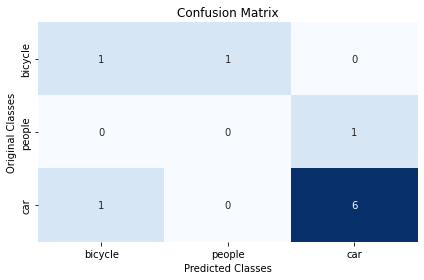

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
dataframe=pd.DataFrame(confusionmatrix,index={"people", "bicycle", "car"} ,columns={"people", "bicycle", "car"})


sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Classes")
plt.ylabel("Original Classes")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(labels_true,labels_run)

0.7

#CONFUSION MATRIX AND ACCURACY IN OOPART DATABASE:

In [ ]:
!python detect.py --weights /content/drive/MyDrive/Yolo_v6/results_V5/results_with_10_class_20000_full_random_weights/exp/weights/best.pt --img 640 --conf 0.3 --source /content/drive/MyDrive/Yolo_v6/videos_imagenes/DJI_0098.JPG  --half --save-txt

detect: weights=['/content/drive/MyDrive/Yolo_v6/results_V5/results_with_10_class_20000_full_random_weights/exp/weights/best.pt'], source=/content/drive/MyDrive/Yolo_v6/videos_imagenes/DJI_0098.JPG, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=True, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-9-gf9ca365 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7037095 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/.shortcut-targets-by-id/1za_W2UBVDgh_wId-x23SZPBiJFViM3EC/Yolo_v6/videos_imagenes/DJI_0098.JPG: 480x640 1 pedestrian, 13 cars, 2 trucks, 1 motor, 57.4ms
Speed: 0.9ms pre-process, 57.4ms inference, 1.4ms NM

In [ ]:
labels_run=pd.read_csv("/content/yolov5/runs/detect/exp3/labels/DJI_0098.txt",header=None,sep=" ")

In [ ]:
labels_run=np.array(labels_run[0])
labels_run

array([3, 9, 3, 3, 5, 3, 3, 0, 3, 3, 3, 5, 3, 3, 3, 3, 3])

In [ ]:
labels_true=np.array([3,2,3,4,5,3,3,0,3,3,3,5,3,3,3,3,4])

In [ ]:
labels_run=list(labels_run)
labels_true=list(labels_true)
for i in range(len(labels_true)):
  labels_run[i]=clases[labels_run[i]]
  labels_true[i]=clases[labels_true[i]]

In [ ]:
confusionmatrix=confusion_matrix(labels_true,labels_run)

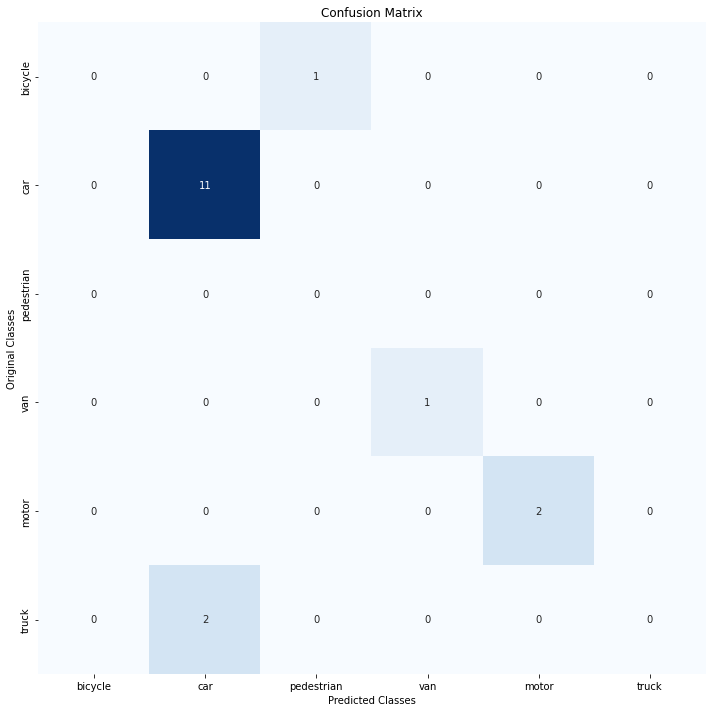

In [ ]:
dataframe=pd.DataFrame(confusionmatrix,index={"pedestrian", "bicycle", "car","van","truck","motor"} ,columns={"pedestrian", "bicycle", "car","van","truck","motor"})


plt.figure(figsize=(10,10))
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Classes")
plt.ylabel("Original Classes")
plt.tight_layout()
plt.show()

In [ ]:
accuracy_score(labels_true,labels_run)

0.8235294117647058